In [ ]:
import tensorflow as tf
print("Versão do TensorFlow:", tf.__version__)

In [ ]:
import keras as K
print("Versão do Keras:", K.__version__)

In [5]:
# Imports
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

classifier = Sequential()

# Passo 1 - Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Passo 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Mais uma camada de pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Passo 3 - Flattening
classifier.add(Flatten())

# Passo 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Criando os objetos train_datagen e validation_datagen com as regras de pré-processamento das imagens
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

# Pré-processamento das imagens de treino e validação
training_set = train_datagen.flow_from_directory('dataset_treino',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('dataset_teste',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')


# Executando o treinamento (esse processo pode levar bastante tempo, dependendo do seu computador)



classifier.fit(training_set,
                         steps_per_epoch = 782,
                         epochs = 5,
                         validation_data = validation_set,
                         validation_steps = 2000)



classifier.save('modelo aprendido')



Found 25000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.
Epoch 1/5
782/782 [==============================] - 474s 604ms/step - loss: 0.6440 - accuracy: 0.6114
Epoch 2/5
782/782 [==============================] - 814s 1s/step - loss: 0.5265 - accuracy: 0.7338
Epoch 3/5
782/782 [==============================] - 441s 563ms/step - loss: 0.4798 - accuracy: 0.7725
Epoch 4/5
782/782 [==============================] - 614s 784ms/step - loss: 0.4514 - accuracy: 0.7833
Epoch 5/5
782/782 [==============================] - 229s 293ms/step - loss: 0.4293 - accuracy: 0.8003
INFO:tensorflow:Assets written to: modelo aprendido\assets


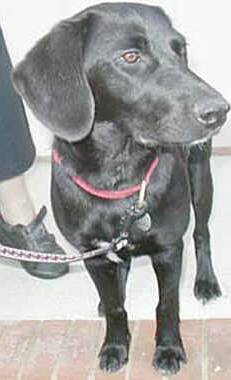

In [3]:
# Primeira Imagem
import numpy as np
from keras.preprocessing import image
from IPython.display import Image
from tensorflow import keras

classifier = keras.models.load_model('modelo aprendido')

test_image = image.load_img('dataset_teste/2216.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
#training_set.class_indices

if result[0][0] == 1:
    prediction = 'Cachorro'
else:
    prediction = 'Gato'

Image(filename='dataset_teste/2216.jpg')

In [4]:
prediction

'Gato'

In [ ]:

test_image = cv2.imread('trick.png')
test_image = cv2.resize(test_image, (64, 64))
test_image = test_image[...,::-1] # Added


import numpy as np
# ...
# ...
test_image = test_image[...,::-1].astype(np.float32)
